# An analysis about  Titanic

## 1 问题提出
### 1.1 我想分析的主要问题是：哪些因素会使乘客的生还率更高
之前对泰坦尼克事件有所了解，船上的妇女和儿童大多得到了救援，因此我将着重分析女性和年龄对生还率的影响。此外，买优等舱的乘客大多是富人或上层人士，我猜测这些人生还率也会比较高。因此将主要分析Sex、Age、Pclass三个因素对生还率的影响。

## 2 数据清理
### 2.1 加载csv
加载csv数据，并且查看相关描述性统计。

In [118]:
import pandas as pd
pan_origin_passengers = pd.read_csv('titanic-data.csv')
pan_origin_passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2 查看当前数据集大小

In [119]:
len(pd_origin_passengers)

891

### 2.3 查看当前数据集概况

In [120]:
pan_origin_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.4 过滤不需要的行数据
由于我之前假定的影响因素包括age、sex、pclass，因此对行数据中这三项是NAN的进行过滤。

In [121]:
# def is_include_NAN(pan_origin_passengers, column_name):
#     null_dataframe = pd.isnull(pan_analysis_passengers[column])
#     null_dataframe_true = null_DataFrame[null_dataframe == True]
#     return len(null_DataFrame_true) > 0

pan_analysis_passengers = pan_origin_passengers.dropna(subset=["Pclass", "Sex", "Age"])
len(pan_analysis_passengers)

714

### 2.5 过滤不需要的列数据
Cabin和Embarked列也有缺失值，且不在分析的因素范围内，把这两列删除。

In [122]:
pan_analysis_passengers = pan_analysis_passengers.dropna(axis=1)
pan_analysis_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


### 2.6 将Sex转换为整型
male用0表示，female用1表示，如果female生还率更高，在后面计算性别与生还率的相关度时，应该会是一个正数。</br>
查看此时的描述性统计。

In [123]:
def convert_sex_type(row):
    if row["Sex"] == "male":
        return 0
    else:
        return 1
pan_analysis_passengers["Sex"] = pan_analysis_passengers.apply(convert_sex_type, 1)
pan_analysis_passengers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


## 3 相关性分析

### 3.1 计算相关性
分别用自定义函数和numpy的corrcoef计算性别、年龄、舱级与生还率的相关性。

In [124]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y).mean()

print correlation(pan_analysis_passengers["Sex"], pan_analysis_passengers["Survived"])
print correlation(pan_analysis_passengers["Age"], pan_analysis_passengers["Survived"])
print correlation(pan_analysis_passengers["Pclass"], pan_analysis_passengers["Survived"])

0.538825593015
-0.0772210945722
-0.359652682087


In [125]:
import numpy as np

print np.corrcoef(pan_analysis_passengers["Sex"], pan_analysis_passengers["Survived"])
print np.corrcoef(pan_analysis_passengers["Age"], pan_analysis_passengers["Survived"])
print np.corrcoef(pan_analysis_passengers["Pclass"], pan_analysis_passengers["Survived"])

[[ 1.          0.53882559]
 [ 0.53882559  1.        ]]
[[ 1.         -0.07722109]
 [-0.07722109  1.        ]]
[[ 1.         -0.35965268]
 [-0.35965268  1.        ]]


通过计算出的相关性可以看出：女性会使生还率大大提高；Pclass越小生还率越高，证明高级舱乘客的生还率较高；年龄的影响看起来比较微小，可能是因为青年成年老年和生还率的相关性不高，影响了儿童的表现。

### 3.2 儿童生还率表现
上面显示年龄与生还率相关性并不是很高，为了证实我对儿童因素的猜测，我将提取出10岁、15岁的乘客，看一下他们的生还率均值是否明显优于平均水平。

In [126]:
children = pan_analysis_passengers[pan_analysis_passengers["Age"] < 10]
children["Survived"].mean()

0.6129032258064516

In [127]:
children = pan_analysis_passengers[pan_analysis_passengers["Age"] < 15]
children["Survived"].mean()

0.5769230769230769

In [128]:
children = pan_analysis_passengers[pan_analysis_passengers["Age"] < 25]
print correlation(children["Age"], children["Survived"])

-0.214052711504


0.58、0.61均明显高于总体生还率均值0.41，而从年龄小于25的人群中计算相关性，也可以看出年龄与生还率的相关性有显著提高。

## 4 综合分析

### 4.1 按年龄分组
我很好奇，除了儿童生还率高，生还率是否还与年龄分布有关，因此按照年龄段进行分组。<br/>
首先打上分组标签，60岁前每10岁一组，60岁以上单独一组。

In [129]:
def age_flag(passenger):
    if passenger['Age'] < 10:
        return 'A'
    elif passenger['Age'] < 20:
        return 'B'
    elif passenger['Age'] < 30:
        return 'C'
    elif passenger['Age'] < 40:
        return 'D'
    elif passenger['Age'] < 50:
        return 'E'
    elif passenger['Age'] < 60:
        return 'F'
    else:
        return 'G'
pan_analysis_passengers['AgeFlag'] = pan_analysis_passengers.apply(age_flag, 1)

对年龄进行分组，查看各年龄组的生还率情况。

In [130]:
passengers_groupby_age = pan_analysis_passengers.groupby('AgeFlag')
passengers_groupby_age['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeFlag,,,,,,,,
A,62.0,0.612903,0.491062,0.0,0.0,1.0,1.00,1.0
B,102.0,0.401961,0.492715,0.0,0.0,0.0,1.00,1.0
C,220.0,0.350000,0.478057,0.0,0.0,0.0,1.00,1.0
D,167.0,0.437126,0.497523,0.0,0.0,0.0,1.00,1.0
E,89.0,0.382022,0.488635,0.0,0.0,0.0,1.00,1.0
F,48.0,0.416667,0.498224,0.0,0.0,0.0,1.00,1.0
G,26.0,0.269231,0.452344,0.0,0.0,0.0,0.75,1.0


由上面分析可以看出，生还率均值随年龄增长逐渐减低（20-40和40-60的生还率情况差不多）。<br/>
用图展示起来会更直观。

Populating the interactive namespace from numpy and matplotlib


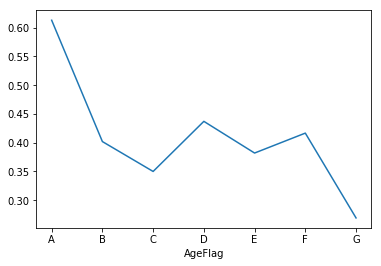

In [131]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
passengers_groupby_age["Survived"].mean().plot()

### 4.2 按舱级分组
由上面按年龄分组，使我对生还率随舱级的变化也产生兴趣，想知道p2和p3舱级的生还率是否相差明显。

In [132]:
passengers_groupby_pclass = pan_analysis_passengers.groupby('Pclass')
passengers_groupby_pclass['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,0.655914,0.476352,0.0,0.0,1.0,1.0,1.0
2,173.0,0.479769,0.501041,0.0,0.0,0.0,1.0,1.0
3,355.0,0.239437,0.427342,0.0,0.0,0.0,0.0,1.0


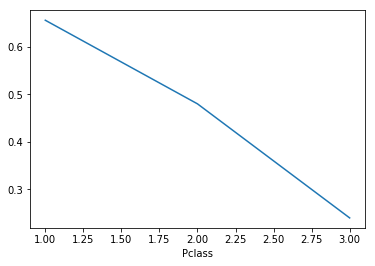

In [133]:
passengers_groupby_pclass["Survived"].mean().plot()

结果很明显，p2舱乘客生还率要比p3高出两倍多。

### 4.3 综合年龄、舱级、性别进行分析

In [134]:
passengers_groupby_apm = pan_analysis_passengers.groupby(['AgeFlag', 'Pclass', 'Sex'])
passengers_groupby_apm['Survived'].describe()

count      mean       std  min  25%  50%   75%  max
AgeFlag Pclass Sex                                                     
A       1      0      2.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
               1      1.0  0.000000       NaN  0.0  0.0  0.0  0.00  0.0
        2      0      9.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
               1      8.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
        3      0     21.0  0.380952  0.497613  0.0  0.0  0.0  1.00  1.0
               1     21.0  0.523810  0.511766  0.0  0.0  1.0  1.00  1.0
B       1      0      5.0  0.400000  0.547723  0.0  0.0  0.0  1.00  1.0
               1     13.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
        2      0     10.0  0.100000  0.316228  0.0  0.0  0.0  0.00  1.0
               1      8.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
        3      0     42.0  0.095238  0.297102  0.0  0.0  0.0  0.00  1.0
               1     24.0  0.541667  0.508977  0.0  0.0  1.0  1.00  1.0
C       1      0     18.0  0.500000  0.514496  0.0  0.0  0.5  1.00  1.0
               1     16.0  0.937500  0.250000  0.0  1.0  1.0  1.00  1.0
        2      0     28.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
               1     25.0  0.880000  0.331662  0.0  1.0  1.0  1.00  1.0
        3      0    102.0  0.156863  0.365467  0.0  0.0  0.0  0.00  1.0
               1     31.0  0.483871  0.508001  0.0  0.0  0.0  1.00  1.0
D       1      0     23.0  0.521739  0.510754  0.0  0.0  1.0  1.00  1.0
               1     27.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
        2      0     31.0  0.096774  0.300537  0.0  0.0  0.0  0.00  1.0
               1     17.0  0.941176  0.242536  0.0  1.0  1.0  1.00  1.0
        3      0     53.0  0.150943  0.361420  0.0  0.0  0.0  0.00  1.0
               1     16.0  0.437500  0.512348  0.0  0.0  0.0  1.00  1.0
E       1      0     24.0  0.375000  0.494535  0.0  0.0  0.0  1.00  1.0
               1     13.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
        2      0      8.0  0.125000  0.353553  0.0  0.0  0.0  0.00  1.0
               1     10.0  0.900000  0.316228  0.0  1.0  1.0  1.00  1.0
        3      0     25.0  0.080000  0.276887  0.0  0.0  0.0  0.00  1.0
               1      9.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
F       1      0     15.0  0.266667  0.457738  0.0  0.0  0.0  0.50  1.0
               1     12.0  0.916667  0.288675  0.0  1.0  1.0  1.00  1.0
        2      0      9.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
               1      6.0  0.833333  0.408248  0.0  1.0  1.0  1.00  1.0
        3      0      6.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
G       1      0     14.0  0.142857  0.363137  0.0  0.0  0.0  0.00  1.0
               1      3.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
        2      0      4.0  0.250000  0.500000  0.0  0.0  0.0  0.25  1.0
        3      0      4.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
               1      1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0

从上面可以大致看出，性别对生还率的影响是巨大的，年龄和舱级相同的情况下，女性的生还率都远远高于男性。<br/>
所以，下面我仅分析舱级、年龄对男性生还率的影响，并用图进行可视化。

In [135]:
male_passengers = pan_analysis_passengers[pan_analysis_passengers.Sex.isin([0])]
male_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,AgeFlag
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,D
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,F
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,A
12,13,0,3,"Saundercock, Mr. William Henry",0,20.0,0,0,A/5. 2151,8.0500,C


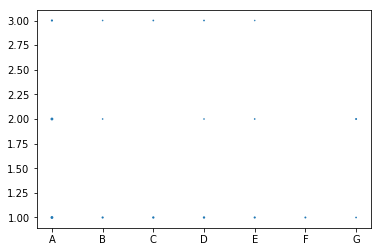

In [136]:
male_passengers_groupby_ap = male_passengers.groupby(['AgeFlag', 'Pclass'], as_index=False).mean()
scaled_survived = (male_passengers_groupby_ap['Survived'] / male_passengers_groupby_ap['Survived'].std())
plt.scatter(male_passengers_groupby_ap['AgeFlag'], male_passengers_groupby_ap['Pclass'], 
            s=scaled_survived)

## 5 结论
### 5.1 性别影响
同等条件下，女性的生还率是远远高于男性的，尤其是在p1、p2舱级的情况下，相差甚至达到9倍。
### 5.2 年龄影响
10岁以下的儿童得到了优先照顾，但是很可惜，p3舱级的儿童并没有p1、p2那么幸运。<br/>
60岁以上的老人生还率与舱级关系很小，基本都已罹难。<br/>
中年人比年轻人的生还率更高一些，凭个人推测，他们的经历要更丰富，应对这种情况可能比年轻人更冷静。
### 5.3 舱级影响
舱级实际代表的是一个人的财力或身份，可以看到地位身份对生还率影响非常重要且影响范围最大。<br/>
小于60的人群，无论男女，p1舱级的生还率都远远领先。

### 5.4 一些问题
在20-40岁男性范围里，p2舱级的生还率反而低于p3,这让人有一些诧异。
另外还观察到有一位60岁以上的p2舱男性活了下来，这也有些说不通。
所以还是存在一些其他因素影响着生还率的。

# 6 题外音
## 6.1 船上有配偶或兄妹的人有多少，和生还率关系怎样

In [137]:
len(pan_analysis_passengers[pan_analysis_passengers["SibSp"] > 0])

243

数据集中有配偶或兄妹的人有243人

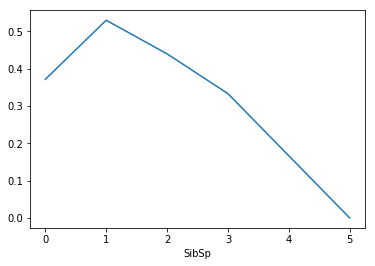

In [138]:
sibsp_passengers = pan_analysis_passengers.groupby(["SibSp"])
sibsp_passengers['Survived'].mean().plot()

## 6.2 船上有父母或子女的人有多少，和生还率的关系怎样

In [139]:
len(pan_analysis_passengers[pan_analysis_passengers["Parch"] > 0])

193

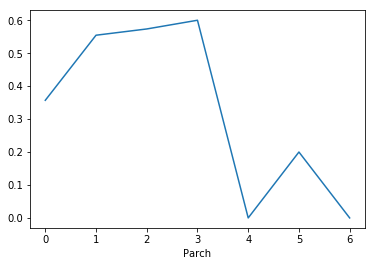

In [140]:
parch_passengers = pan_analysis_passengers.groupby(["Parch"])
parch_passengers['Survived'].mean().plot()

# 7 参考资料
https://www.cnblogs.com/wuzhiblog/p/python_pandas.html<br\>
http://blog.csdn.net/leonis_v/article/details/51832916<br\>
https://www.cnblogs.com/chaosimple/p/4153083.html<br\>
https://www.dataquest.io/m/12/working-with-missing-data